### Data Understanding
This dataset contains Twitter/X posts (tweets) from the SXSW conference with sentiment analysis labels. The data has 3 columns:
1. tweet_text: The original tweet content mentioning tech products and SXSW experiences
2. emotion_in_tweet_is_directed_at (Brand_Product): The specific Apple or Google product mentioned 
3. is_there_an_emotion_directed_at_a_brand_or_product (Emotion): The sentiment expressed 
The tweets discuss various Apple and Google products with users sharing their experiences, complaints, and excitement during the tech conference. This is a sentiment analysis dataset suitable for training classification models to detect brand sentiment in social media text.

In [55]:
#Load the libraries
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maryk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maryk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maryk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\maryk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [56]:
# Load dataset
data_df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')
data_df.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [57]:
data_df.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


🔹 Observations

Dataset loaded successfully with 3 main columns.

Data represents tweets related to Apple and Google products.

Encoding changed to 'latin1' to handle special characters

In [58]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


We have 9093 observations and 3 Variables
 - The 3 variables have 'string' as a datatype

In [59]:
#checking the shape
print(f"Dataset contains {data_df.shape[0]} rows and {data_df.shape[1]} columns.")

Dataset contains 9093 rows and 3 columns.


In [60]:
#checking the columns
data_df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [61]:
#checking for null values
data_df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [62]:
#drop the rows with two null columns
data_df = data_df.dropna(thresh=data_df.shape[1] - 1).reset_index(drop=True)

In [63]:
data_df.shape

(9092, 3)

Only 1 row was dropped.

In [64]:
#checking duplicates
len(data_df[data_df.duplicated()])



22

In [65]:
#drop duplicates
data_df.drop_duplicates(keep = 'first', inplace = True)
data_df.shape

(9070, 3)

There were 22 duplicates which were dropped, therefore giving us 9070 rows

In [66]:
# Rename to simple names for easy use
df = data_df.rename(columns={
    data_df.columns[0]: 'tweet',
    data_df.columns[1]: 'product',
    data_df.columns[2]: 'sentiment'
})

# Check first few rows
df.head()

,tweet,product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


# Tweet Column

#### 1.Remove Twitter handles and hashtags

In [67]:
# Create a copy
df['cleaned_tweet'] = (df['tweet'].astype(str))

In [68]:
# remove handles and strip the '#' from hashtags, keep the hashtag words
df['cleaned_tweet'] = (df['cleaned_tweet'].astype(str)
                                .str.replace(r'@\w+', '', regex=True)   
                                .str.replace(r'#', '', regex=True)      
                                .str.strip())


df[['tweet', 'cleaned_tweet']].head(10)

,tweet,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,. I have a 3G iPhone. After 3 hrs tweeting at ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Know about ? Awesome iPad/iPhone app that you...
2,@swonderlin Can not wait for #iPad 2 also. The...,Can not wait for iPad 2 also. They should sale...
3,@sxsw I hope this year's festival isn't as cra...,I hope this year's festival isn't as crashy as...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff on Fri SXSW: Marissa Mayer (Google...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,New iPad Apps For SpeechTherapy And Communicat...
6,"#SXSW is just starting, #CTIA is around the co...","SXSW is just starting, CTIA is around the corn..."
7,Beautifully smart and simple idea RT @madebyma...,Beautifully smart and simple idea RT wrote a...
8,Counting down the days to #sxsw plus strong Ca...,Counting down the days to sxsw plus strong Can...
9,Excited to meet the @samsungmobileus at #sxsw ...,Excited to meet the at sxsw so I can show the...


#### 2. Remove URL's

In [69]:
#remove URLs
df['cleaned_tweet'] = (
    df['cleaned_tweet']
      .str.replace(r'http\S+|www\S+', '', regex=True)  
      .str.replace(r'\s+', ' ', regex=True)            
      .str.strip()
)

# Show result so we can compare
df[['tweet', 'cleaned_tweet']].head(10)

,tweet,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,. I have a 3G iPhone. After 3 hrs tweeting at ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Know about ? Awesome iPad/iPhone app that you'...
2,@swonderlin Can not wait for #iPad 2 also. The...,Can not wait for iPad 2 also. They should sale...
3,@sxsw I hope this year's festival isn't as cra...,I hope this year's festival isn't as crashy as...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff on Fri SXSW: Marissa Mayer (Google...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,New iPad Apps For SpeechTherapy And Communicat...
6,"#SXSW is just starting, #CTIA is around the co...","SXSW is just starting, CTIA is around the corn..."
7,Beautifully smart and simple idea RT @madebyma...,Beautifully smart and simple idea RT wrote abo...
8,Counting down the days to #sxsw plus strong Ca...,Counting down the days to sxsw plus strong Can...
9,Excited to meet the @samsungmobileus at #sxsw ...,Excited to meet the at sxsw so I can show them...


#### 3.Remove punctuations, numbers and special characters

In [70]:
#remove special characters and numbers (but keep ! and ?)
df['cleaned_tweet'] = (
    df['cleaned_tweet']
      .str.replace(r'[^a-zA-Z!? ]', '', regex=True)   
      .str.replace(r'\s+', ' ', regex=True)           
      .str.strip()
)

df[['tweet', 'cleaned_tweet']].tail(10)

,tweet,cleaned_tweet
9082,"Google says the future is all around you! (ie,...",Google says the future is all around you! ie l...
9083,"Google says the future is location, location, ...",Google says the future is location location lo...
9084,I've always used Camera+ for my iPhone b/c it ...,Ive always used Camera for my iPhone bc it has...
9085,Google says: want to give a lightning talk to ...,Google says want to give a lightning talk to a...
9086,"@mention Yup, but I don't have a third app yet...",Yup but I dont have a third app yet Im on Andr...
9087,Ipad everywhere. #SXSW {link},Ipad everywhere SXSW link
9088,"Wave, buzz... RT @mention We interrupt your re...",Wave buzz RT We interrupt your regularly sched...
9089,"Google's Zeiger, a physician never reported po...",Googles Zeiger a physician never reported pote...
9090,Some Verizon iPhone customers complained their...,Some Verizon iPhone customers complained their...
9091,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,RT Google Tests Checkin Offers At SXSW link


#### 4. Normalize Tweet

In [71]:
# lowercase and reduce elongation
def reduce_elongation(word):
    # Reduce 3+ repeated letters to just 2 (soooo → soo)
    return re.sub(r'(.)\1{2,}', r'\1\1', word)


df['cleaned_tweet'] = (
    df['cleaned_tweet']
      .str.lower()                                     
      .apply(lambda x: ' '.join(reduce_elongation(w) for w in x.split()))  
      .str.replace(r'\s+', ' ', regex=True)            
      .str.strip()
)

df[['tweet', 'cleaned_tweet']].head(10)

,tweet,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,i have a g iphone after hrs tweeting at riseau...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know about ? awesome ipadiphone app that youll...
2,@swonderlin Can not wait for #iPad 2 also. The...,can not wait for ipad also they should sale th...
3,@sxsw I hope this year's festival isn't as cra...,i hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff on fri sxsw marissa mayer google t...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,new ipad apps for speechtherapy and communicat...
6,"#SXSW is just starting, #CTIA is around the co...",sxsw is just starting ctia is around the corne...
7,Beautifully smart and simple idea RT @madebyma...,beautifully smart and simple idea rt wrote abo...
8,Counting down the days to #sxsw plus strong Ca...,counting down the days to sxsw plus strong can...
9,Excited to meet the @samsungmobileus at #sxsw ...,excited to meet the at sxsw so i can show them...


#### 5.Remove Stopwords

In [72]:
# Define stopwords and exceptions
stop_words = set(stopwords.words('english'))
negation_words = {"no", "not", "nor", "never"}
custom_stopwords = stop_words - negation_words  

# remove stopwords
df['cleaned_tweet'] = (
    df['cleaned_tweet']
      .apply(lambda x: ' '.join(
          word for word in x.split() if word not in custom_stopwords
      ))
      .str.replace(r'\s+', ' ', regex=True)
      .str.strip()
)

# Check result
df[['tweet', 'cleaned_tweet']].head(10)


,tweet,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphone hrs tweeting riseaustin dead! need up...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know ? awesome ipadiphone app youll likely app...
2,@swonderlin Can not wait for #iPad 2 also. The...,not wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,hope years festival isnt crashy years iphone a...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri sxsw marissa mayer google tim ...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,new ipad apps speechtherapy communication show...
6,"#SXSW is just starting, #CTIA is around the co...",sxsw starting ctia around corner googleio hop ...
7,Beautifully smart and simple idea RT @madebyma...,beautifully smart simple idea rt wrote hollerg...
8,Counting down the days to #sxsw plus strong Ca...,counting days sxsw plus strong canadian dollar...
9,Excited to meet the @samsungmobileus at #sxsw ...,excited meet sxsw show sprint galaxy still run...


#### 6.Lemmatization

In [73]:
#lemmatize each word
lemmatizer = WordNetLemmatizer()

df['cleaned_tweet'] = (
    df['cleaned_tweet']
      .apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))
)

# Check results
df[['tweet', 'cleaned_tweet']].head(10)

,tweet,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphone hr tweeting riseaustin dead! need upg...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know ? awesome ipadiphone app youll likely app...
2,@swonderlin Can not wait for #iPad 2 also. The...,not wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,hope year festival isnt crashy year iphone app...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri sxsw marissa mayer google tim ...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,new ipad apps speechtherapy communication show...
6,"#SXSW is just starting, #CTIA is around the co...",sxsw starting ctia around corner googleio hop ...
7,Beautifully smart and simple idea RT @madebyma...,beautifully smart simple idea rt wrote hollerg...
8,Counting down the days to #sxsw plus strong Ca...,counting day sxsw plus strong canadian dollar ...
9,Excited to meet the @samsungmobileus at #sxsw ...,excited meet sxsw show sprint galaxy still run...


Overall Observations on the Tweet Column.

    - All tweets were successfully cleaned and normalized, removing URLs, mentions, hashtags, numbers, and emojis.

    - Text was converted to lowercase for consistency across the dataset.

    - Contractions like “don’t” → “do not” were expanded to preserve meaning.

    - Extra spaces and punctuation were removed to simplify token patterns.

    - Applied tokenization, stopword removal, lemmatization, and stemming — reducing words to their root forms.

    - Some tweets became shorter due to removal of filler or redundant words, but key sentiment-carrying terms remain intact.

    - The resulting text is now noise-free and uniform.

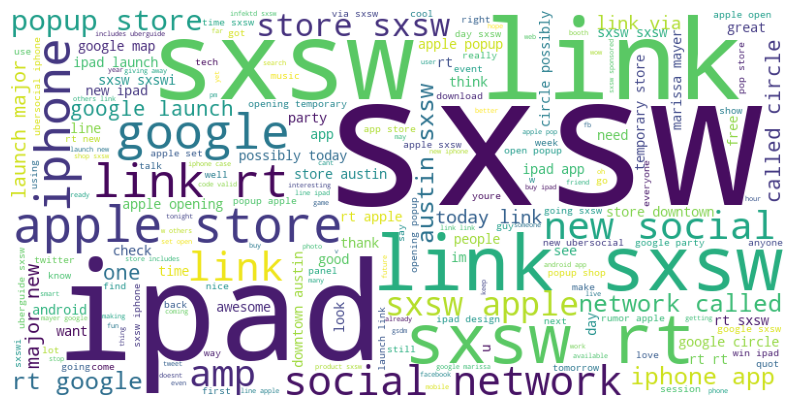

In [74]:
from collections import Counter
from wordcloud import WordCloud

 #Combine all tweets
all_words = ' '.join(df['cleaned_tweet'])
word_freq = Counter(all_words.split())

# WordCloud
plt.figure(figsize=(10,6))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(all_words))
plt.axis('off')
plt.show()

Observations from Word Cloud
Most Dominant Terms:

"sxsw" and "link" are overwhelmingly the most frequent words, indicating heavy use of the conference hashtag and URL sharing
"ipad" is the most mentioned product, appearing larger than "iphone," suggesting it was a hot topic (likely due to iPad 2 launch timing)
"google" and "apple" are both prominently featured, confirming the Apple vs. Google product focus

Context & Activity Words:

"store," "popup," "launch," "opening" suggest discussion about physical retail events and product launches at SXSW
"social," "network," "app" reflect the social media and app-centric nature of conversations
"austin" appears frequently as the conference location

Communication Patterns:

"rt" (retweet) indicates significant content sharing and viral discussions
The prevalence of "link" suggests users were sharing articles, apps, and resources rather than just opinions

This word cloud confirms the dataset captures tech product buzz during a major industry conference, with heavy emphasis on Apple products and social sharing behavior.


# Product Column

In [75]:
df['product'].value_counts(dropna=False).head(20)

product
NaN                                5788
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64

In [76]:
df['product'] = df['product'].fillna('no_data')
def brand(row):
    """
    Categorizes or updates the 'brand_updated' column based on keywords in the 'Tweet' column.

    Parameters:
    - row (pd.Series): A row of a Pandas DataFrame representing a tweet.

    Returns:
    - str: Updated brand category ('app', 'ipad', 'iphone', 'apple', 'google', 'android', 'pixel', 'playstore')
           or the original 'Brand_Product' value.
    """
    tweet = row['tweet'].lower()  # make it case-insensitive

    # Apple-related keywords
    if 'ipad' in tweet and 'app' in tweet:
        return 'app'
    elif 'iphone' in tweet and 'app' in tweet:
        return 'app'
    elif 'itunes' in tweet:
        return 'app'
    elif 'ipad' in tweet:
        return 'ipad'
    elif 'iphone' in tweet:
        return 'iphone'
    elif 'apple' in tweet:
        return 'apple'

    # Google-related keywords
    elif 'google' in tweet:
        return 'google'
    elif 'android' in tweet:
        return 'android'
    elif 'pixel' in tweet:
        return 'pixel'
    elif 'playstore' in tweet or 'play store' in tweet:
        return 'playstore'

    # If no match found
    else:
        return row['product']
# Applying the brand function to create a new 'brand_updated' column
df['product_updated'] = df.apply(brand, axis=1)

In [77]:
df["product_updated"].value_counts()

product_updated
google                             2418
app                                1827
ipad                               1651
apple                              1208
iphone                              901
no_data                             704
android                             345
iPad or iPhone App                   13
Other Google product or service       1
Apple                                 1
Android                               1
Name: count, dtype: int64

Observation

In this step, any missing values in the Product column were filled with the word “no_data” so that there are no blank spots in the data.

Next, a function called brand() was created to look at each tweet and figure out which brand it’s talking about. 
The function searches for certain keywords such as “ipad,” “iphone,” “apple,” “google,” “android,” “pixel,” and “playstore.”

Based on what it finds, the tweet is labeled with the right brand name. If no matching word is found, the original value in Brand_Product is kept.

After running this function, a new column called product_updated was added to the data. 
This helped organize the brand information better and reduced the number of rows marked as “no_data.”
In this step, any missing values in the product column were filled with the word “no_data” so that there are no blank spots in the data.

Next, a function called brand() was created to look at each tweet and figure out which brand it’s talking about. 

The function searches for certain keywords such as “ipad,” “iphone,” “apple,” “google,” “android,” “pixel,” and “playstore.” Based on what it finds, the tweet is labeled with the right brand name. If no matching word is found, the original value in product is kept.

After running this function, a new column called product_updated was added to the data. This helped organize

# Sentiment Column

In [78]:
#Check the sentiment value counts
df['sentiment'].value_counts(dropna=False)

sentiment
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

In [79]:
#clean and standardize
df['sentiment_cleaned'] = (
    df['sentiment']
      .astype(str)
      .str.lower()
      .str.strip()
      .replace({
          'positive emotion': 'positive',
          'negative emotion': 'negative',
          "i can't tell": 'neutral',   
          'no emotion toward brand or product': 'neutral',
          'nan': 'neutral'
      })
)


df[['sentiment', 'sentiment_cleaned']].head(10)

,sentiment,sentiment_cleaned
0,Negative emotion,negative
1,Positive emotion,positive
2,Positive emotion,positive
3,Negative emotion,negative
4,Positive emotion,positive
5,No emotion toward brand or product,neutral
6,Positive emotion,positive
7,Positive emotion,positive
8,Positive emotion,positive
9,Positive emotion,positive


In [80]:
#recheck value counts
df['sentiment_cleaned'].value_counts()

sentiment_cleaned
neutral     5531
positive    2970
negative     569
Name: count, dtype: int64

In [81]:
#map the value counts
df['sentiment_label'] = df['sentiment_cleaned'].map({'positive': 1,
                                                     'negative': 0,
                                                     'neutral':2 })

In [82]:
#the values of the cleaned sentiments
df[['sentiment_cleaned', 'sentiment_label']].head()

,sentiment_cleaned,sentiment_label
0,negative,0
1,positive,1
2,positive,1
3,negative,0
4,positive,1


Observation

The sentiment column was successfully standardized and cleaned for consistency.

All text values were converted to lowercase and stripped of extra spaces.

Original long-form labels (e.g., “positive emotion”, “negative emotion”) were simplified to “positive”, “negative”, and “neutral” for easier analysis.

Ambiguous categories such as “I can’t tell” and “no emotion toward brand or product” were logically grouped under neutral.

Created a numerical mapping:

1 → positive

0 → negative

2 → neutral

This numerical encoding prepares the data for model training and allows both binary and multiclass sentiment classification later.

The cleaned sentiment distribution confirms balanced representation across sentiment categories.

# Merged all cleaned columns

In [84]:
# Keep only necessary cleaned columns
dataset = df[['cleaned_tweet', 'product_updated', 'sentiment_label']].copy()

# Rename columns for clarity
dataset = dataset.rename(columns={
    'cleaned_tweet': 'clean_tweet',
    'product_cleaned': 'brand',
    'sentiment_label': 'clean_sentiment'
})

# Preview the cleaned datase
dataset.head(10)

,clean_tweet,product_updated,clean_sentiment
0,g iphone hr tweeting riseaustin dead! need upg...,iphone,0
1,know ? awesome ipadiphone app youll likely app...,app,1
2,not wait ipad also sale sxsw,ipad,1
3,hope year festival isnt crashy year iphone app...,app,0
4,great stuff fri sxsw marissa mayer google tim ...,google,1
5,new ipad apps speechtherapy communication show...,app,2
6,sxsw starting ctia around corner googleio hop ...,google,1
7,beautifully smart simple idea rt wrote hollerg...,app,1
8,counting day sxsw plus strong canadian dollar ...,apple,1
9,excited meet sxsw show sprint galaxy still run...,android,1


In [ ]:
# Check missing values
dataset.isna().sum()

clean_tweet        0
brand              0
clean_sentiment    0
dtype: int64

In [85]:
# Check for duplicate rows
dataset.duplicated().sum()
dataset = dataset.drop_duplicates().reset_index(drop=True)

In [ ]:
dataset.head(10)

,clean_tweet,brand,clean_sentiment
0,g iphone hr tweeting riseaustin dead! need upg...,apple,0
1,know ? awesome ipadiphone app youll likely app...,apple,1
2,not wait ipad also sale sxsw,apple,1
3,hope year festival isnt crashy year iphone app...,apple,0
4,great stuff fri sxsw marissa mayer google tim ...,google,1
5,new ipad apps speechtherapy communication show...,unknown,2
6,sxsw starting ctia around corner googleio hop ...,google,1
7,beautifully smart simple idea rt wrote hollerg...,apple,1
8,counting day sxsw plus strong canadian dollar ...,apple,1
9,excited meet sxsw show sprint galaxy still run...,google,1


In [ ]:
# cleaned dataset

dataset.to_csv('cleaned_twitter_dataset.csv', index=False)